In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils
import plotting as pt
import pandas as pd
import numpy as np
from utils import load_data_dataframe


df = load_data_dataframe()
utils.turn_off_scientific_notation()

# Getting Rid of Outliers 

In [2]:
utils.turn_off_scientific_notation()
filtered, outliers = utils.drop_all_outliers(df)

# Qualities Radar Graph

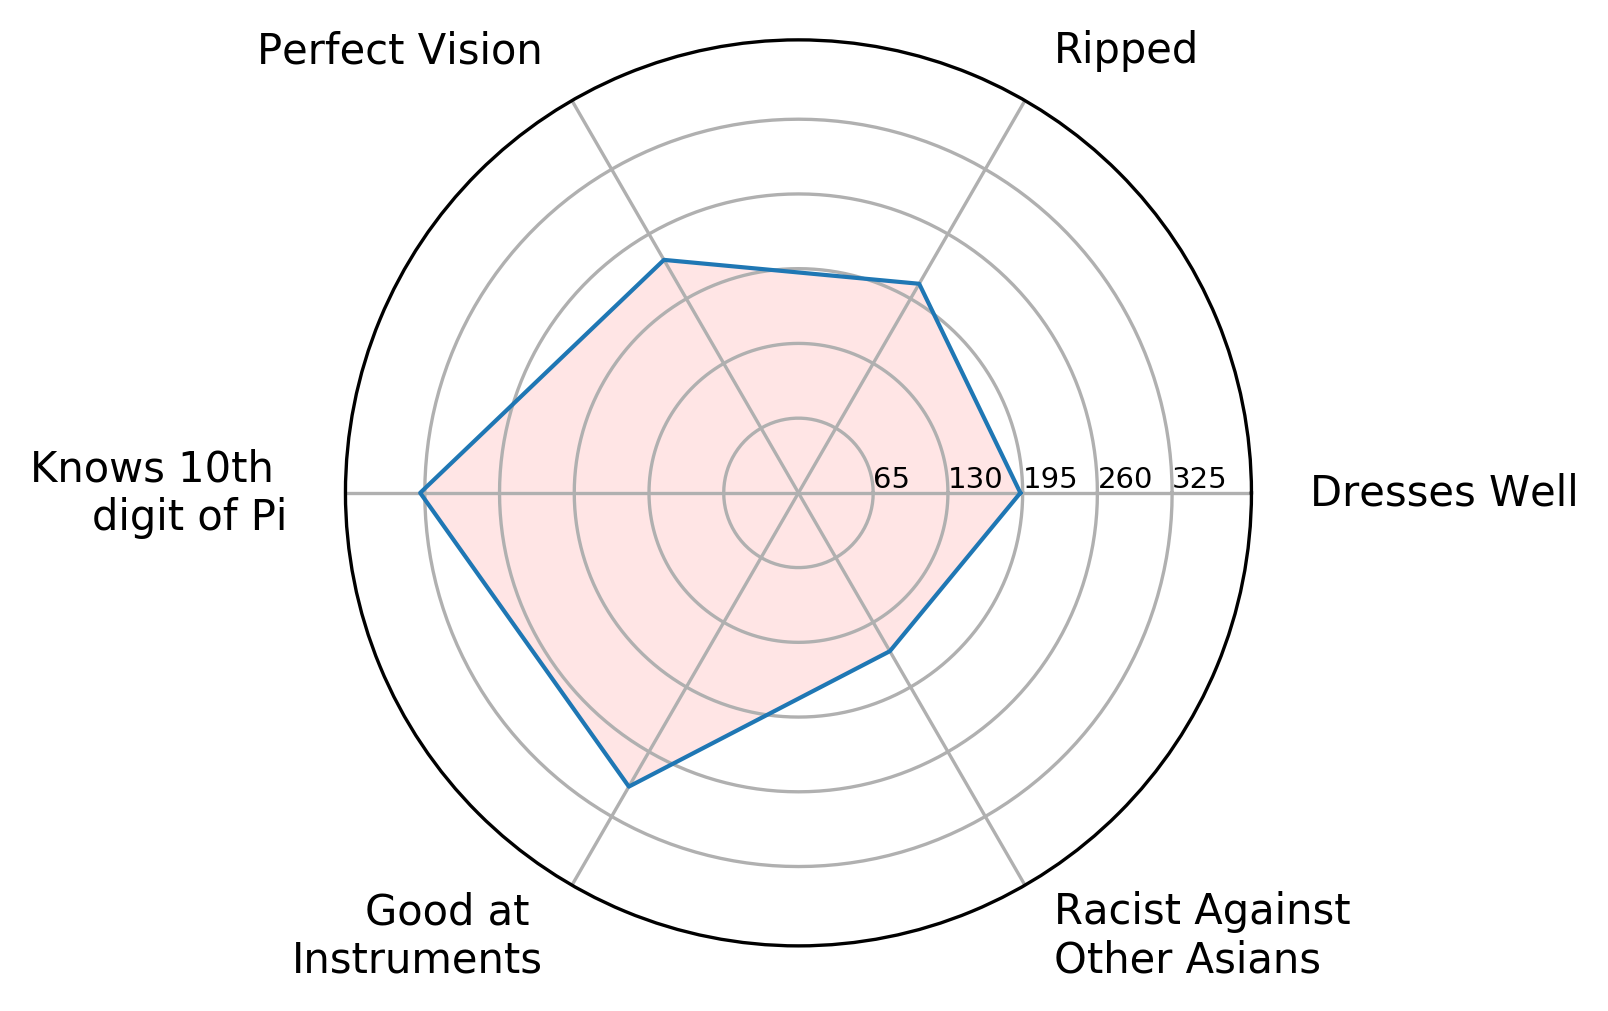

In [3]:
qualities = [
    'dress_like_fuccboi',
    'ripped',
    'perfect_vision',
    'pi_tenth_digit',
    'instrument_good',
    'racist_against_other_asians'
]

xlabels = {
    'dress_like_fuccboi': 'Dresses Well',
    'ripped': 'Ripped',
    'perfect_vision': 'Perfect Vision',
    'pi_tenth_digit': 'Knows 10th \ndigit of Pi',
    'instrument_good': 'Good at \nInstruments',
    'racist_against_other_asians': 'Racist Against \nOther Asians'
}
dpi = 300
mpl.rcParams['figure.dpi']= dpi
x = pt.plot_radar_df(filtered, qualities, xlabels, fill_color='red')



# Social Traits Radar Graph

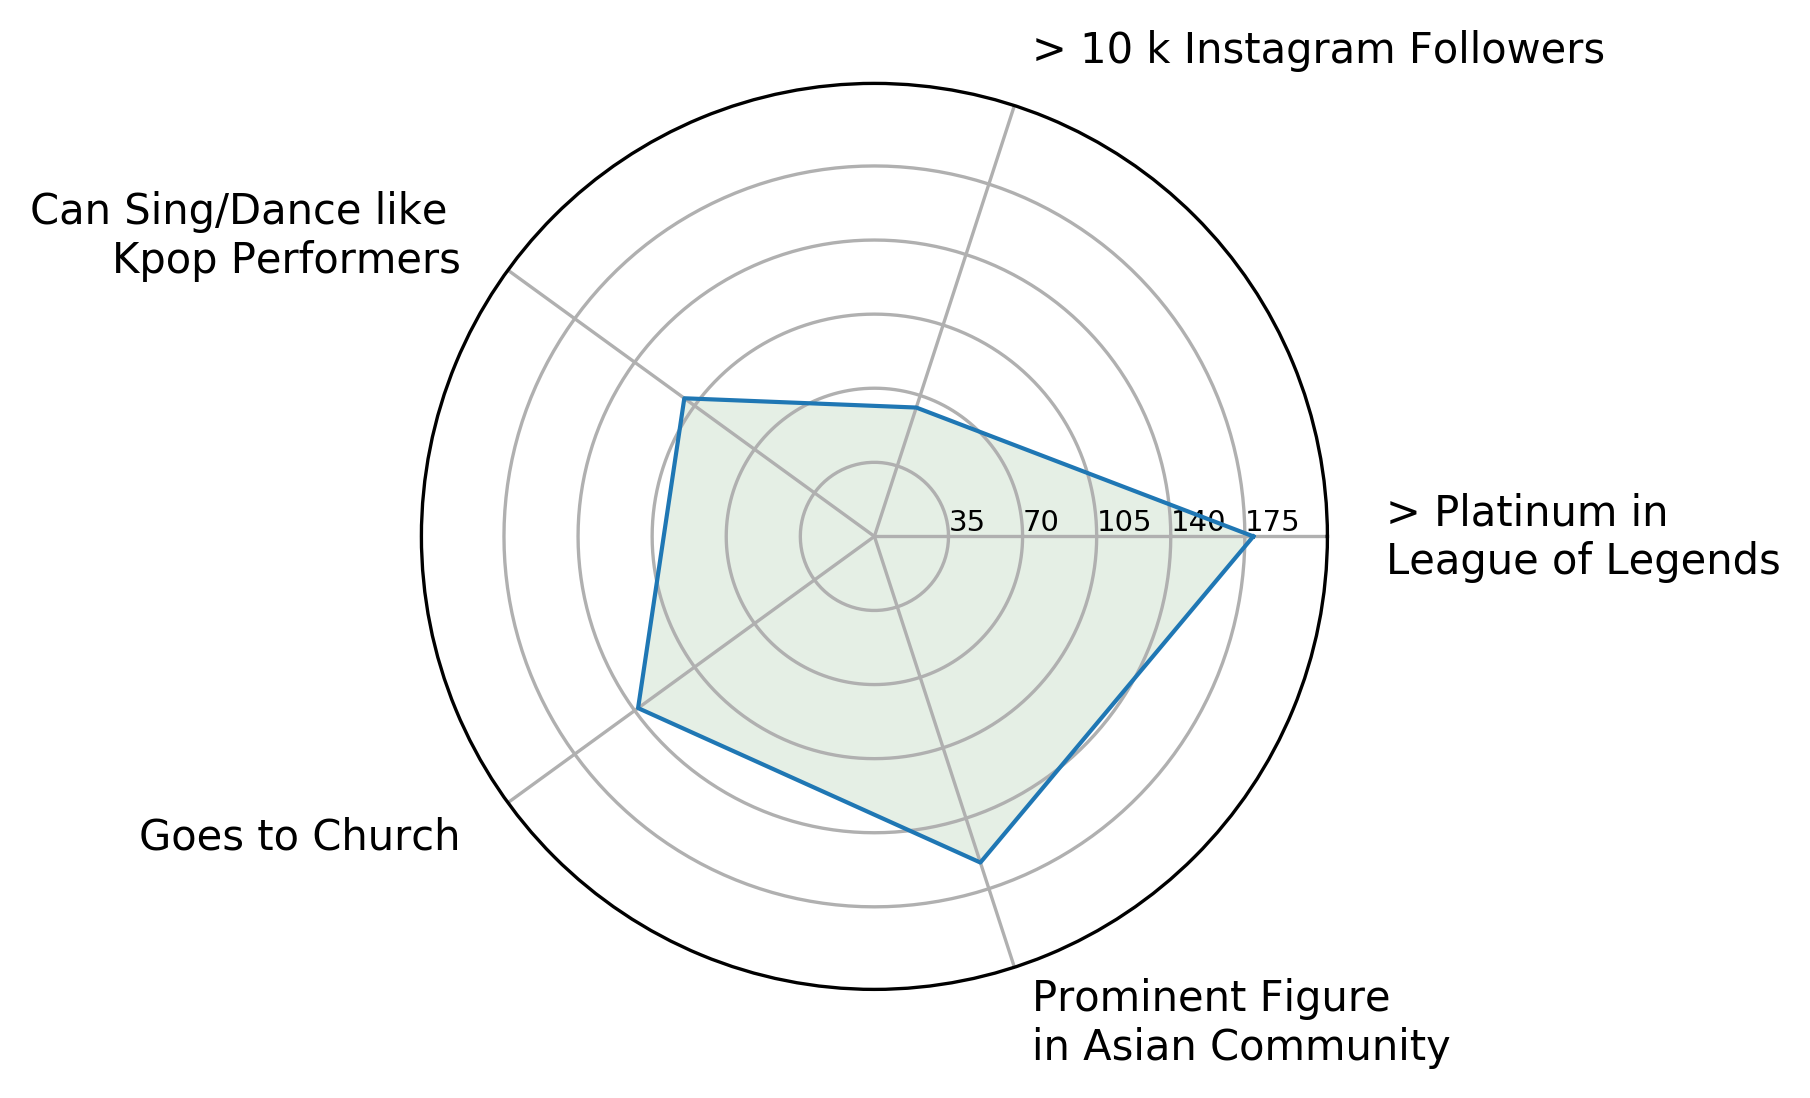

In [4]:
social = [
    'above_platinum',
    'over_10k_instagram',
    'kpop_dance_sing',
    'church_going',
    'asian_community_prominent_figure'
]

xlabels = {
    'above_platinum': '> Platinum in \nLeague of Legends',
    'over_10k_instagram': '> 10 k Instagram Followers',
    'kpop_dance_sing': 'Can Sing/Dance like \nKpop Performers',
    'church_going': 'Goes to Church',
    'asian_community_prominent_figure': 'Prominent Figure \nin Asian Community'
}

pt.plot_radar_df(filtered, social, xlabels,'darkgreen')

# Hexbin Graph for Heights

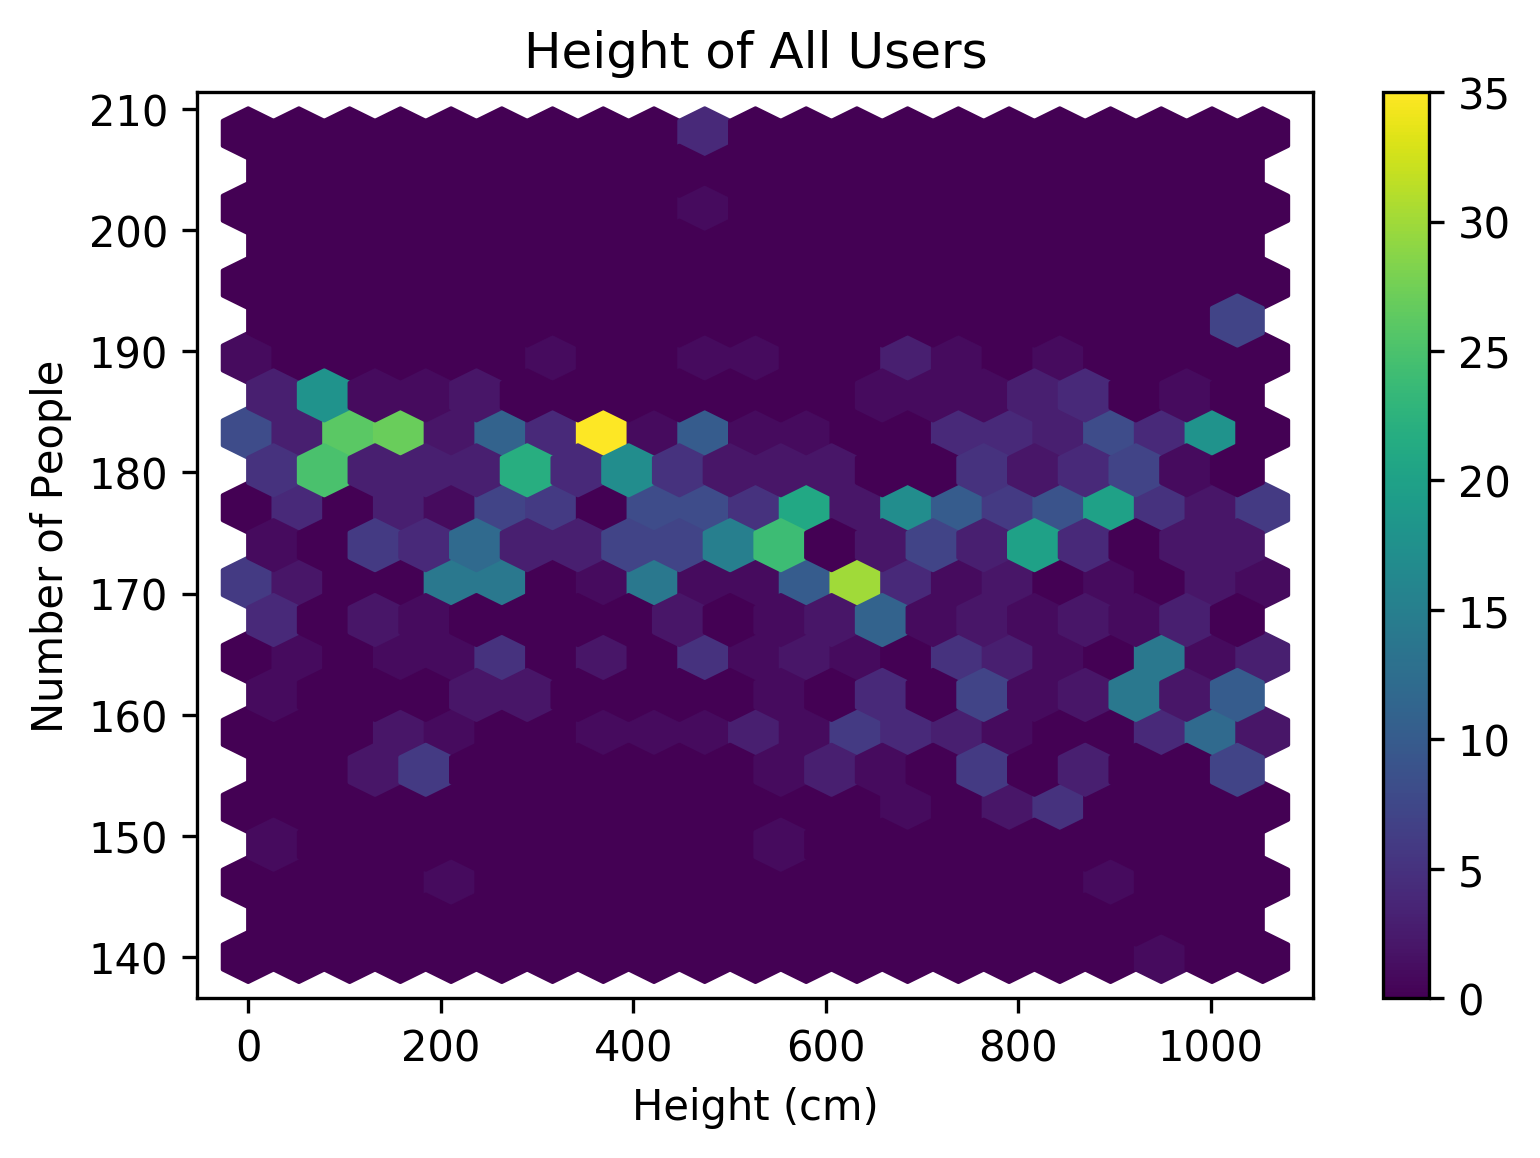

In [5]:
height_df = filtered['height_cm']



height_df = height_df.to_frame()
heights  = height_df['height_cm'].values.tolist()

users = height_df['height_cm'].index.values.tolist()

mpl
dpi = 300
mpl.rcParams['figure.dpi']= dpi

plt.hexbin(users,heights,gridsize=20,cmap='viridis')
plt.title("Height of All Users")
plt.xlabel("Number of People")
plt.xlabel("Height (cm)")
plt.ylabel("Number of People")
plt.colorbar()

# Gathering Data for Responses: Always Offers to pay, Salty About Paying, and Lets the Girl Pay for Dinner if She Wants

In [6]:
q1 = filtered['always_offer_to_pay'].sum()
q2 = filtered['salty_about_paying'].sum()
q3 = filtered['let_the_girl_pay_if_she_wants'].sum()

total = len(filtered.index)


q1_mean = q1/total
q2_mean = q2/total
q3_mean = q3/total

total_traits = [q1,q2,q3]


# Pie Chart of the Data Above

Text(0.5, 1.0, 'Total Paying Differences')

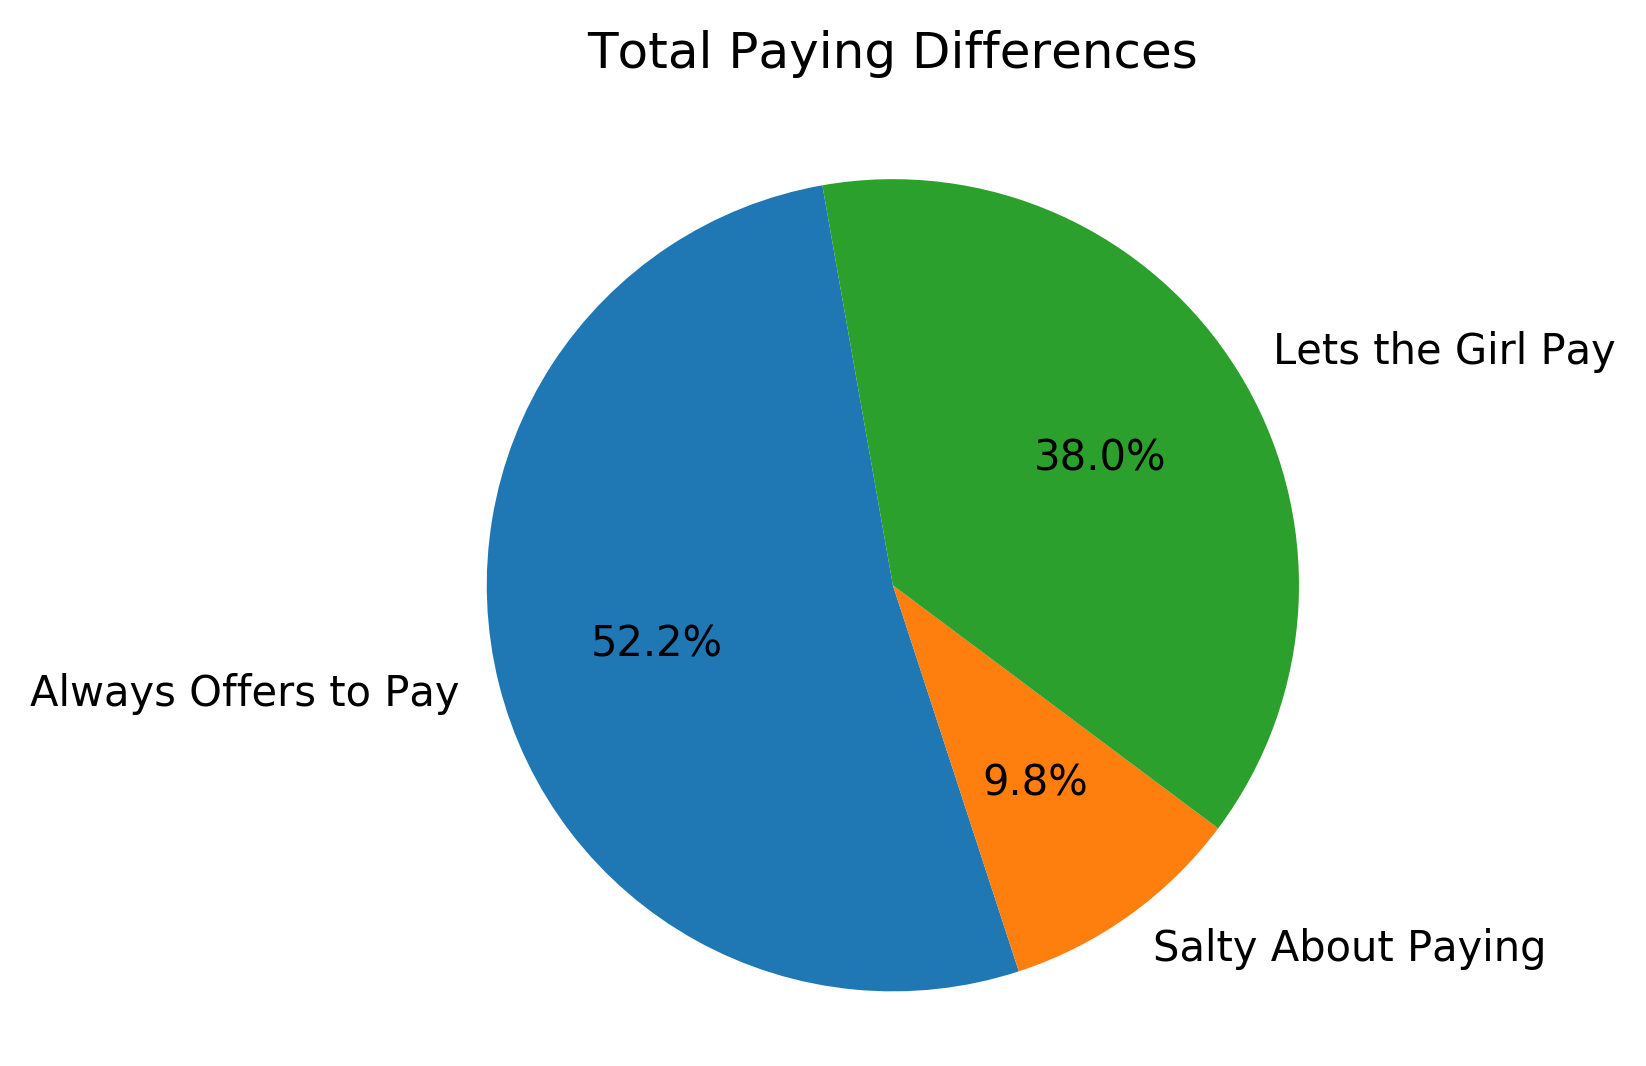

In [7]:
traits = ['Always Offers to Pay','Salty About Paying',"Lets the Girl Pay"]
plt.pie(total_traits, labels=traits,autopct='%1.1f%%',startangle=100)
plt.axis('equal')
plt.title('Total Paying Differences',pad=15)


# Data for Salary Groups: Over 80k, 100k, and 200k

In [8]:
salary_80k = filtered.loc[filtered['salary_over_80k']==True]
salary_100k = filtered.loc[filtered['salary_over_100k']==True]
salary_200k = filtered.loc[filtered['salary_over_200k']==True]

In [9]:
manners_eval = ['always_offer_to_pay', 'salty_about_paying', 'let_the_girl_pay_if_she_wants']

total_80k = salary_80k[manners_eval].sum()
total_80k = total_80k.values.tolist()

total_100k = salary_100k[manners_eval].sum()
total_100k = total_100k.values.tolist()

total_200k = salary_200k[manners_eval].sum()
total_200k = total_200k.values.tolist()

# Bar Chart of Responses from Each Salary Group Over 80k

<Figure size 1800x1200 with 0 Axes>

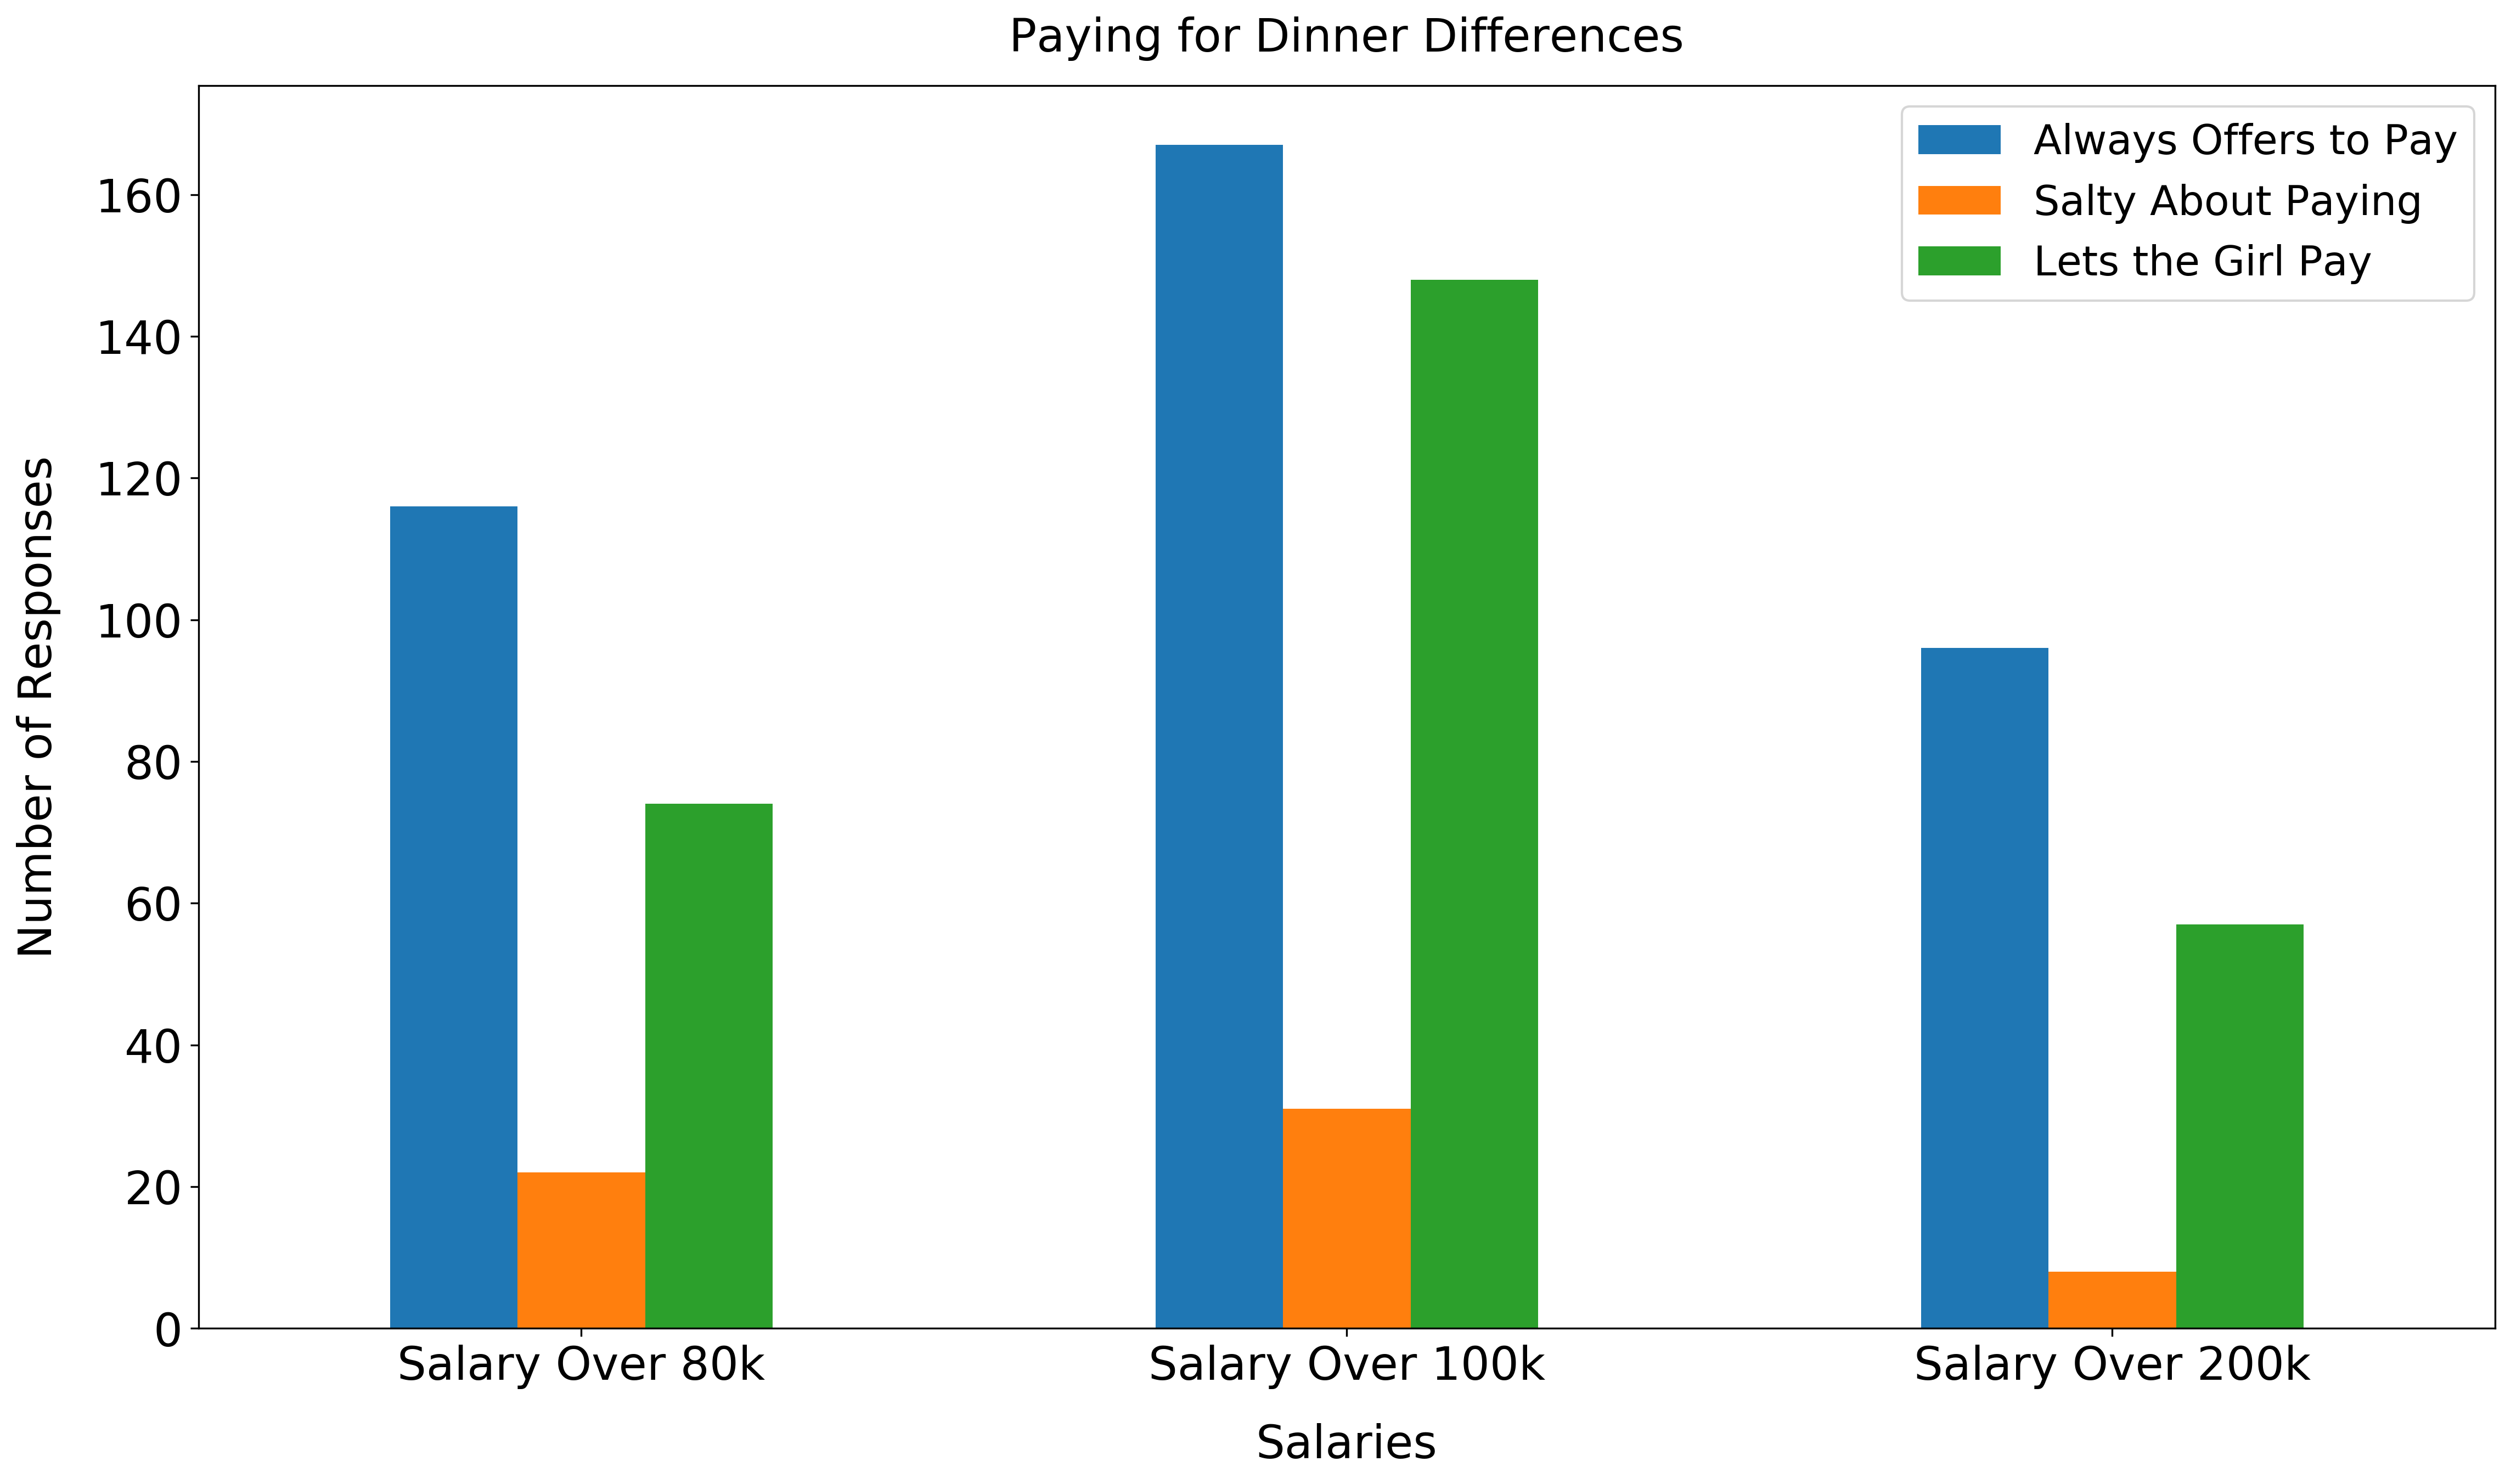

In [10]:

salary_labels = ["Salary Over 80k","Salary Over 100k","Salary Over 200k"]
salaries = [total_80k,total_100k,total_200k]

salaries_df = pd.DataFrame(salaries,salary_labels,columns=traits)

mpl
dpi = 300
mpl.rcParams['figure.dpi']= dpi
fig = plt.figure()

ax = salaries_df.plot.bar( figsize=(18,10),rot=0)
ax.set_xlabel("Salaries",fontsize=20)
ax.set_ylabel("Number of Responses",fontsize=20)
ax.set_title("Paying for Dinner Differences",fontsize=20, pad=15)
ax.legend(traits,fontsize=18)

ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.tick_params(labelsize=20)
